<h2> Importing Important Packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h2>Importing Dataset that already preprocessed

In [3]:
preprocessed_dataset = pd.read_csv(
    "data/preprocessed.csv", names=['Year-3', 'Year-2', 'Year-1', 'Target'], sep="," ,skiprows=[0])

preprocessed_dataset.head()

,Year-3,Year-2,Year-1,Target
0,644642,643266,642120,661179
1,643266,642120,661179,647198
2,642120,661179,647198,621605
3,661179,647198,621605,612393
4,647198,621605,612393,654289


<h2> Split Dataset into 2 gourp (train and test test)

In [4]:
train_data = preprocessed_dataset.sample(frac=0.9, random_state=0)
test_data = preprocessed_dataset.drop(train_data.index)

train_labels = train_data.pop('Target')
test_labels = test_data.pop('Target')

<h2> make Modeling function

In [5]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu,
                     input_shape=[len(train_data.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model

In [6]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


<h2> Train Regression model 

In [7]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

epochs = 1000

history = model.fit(train_data, train_labels, epochs=epochs, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

<h2> Plotting Training Process

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#Show last Epoch matrics result
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,750668608.0,24252.541016,750668608.0,2.939467e+09,37118.515625,2.939467e+09,995
996,752632192.0,21971.259766,752632192.0,1.922767e+09,37412.406250,1.922767e+09,996
997,749478080.0,24223.683594,749478080.0,2.941583e+09,37136.671875,2.941583e+09,997
998,753628288.0,21986.103516,753628288.0,1.922461e+09,37444.187500,1.922461e+09,998
999,751943104.0,24261.392578,751943104.0,2.942856e+09,37147.734375,2.942856e+09,999


In [9]:
def ploting_history(history):

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error (Target)')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['mae'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 5])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error (Target^2)')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['mae'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 20])

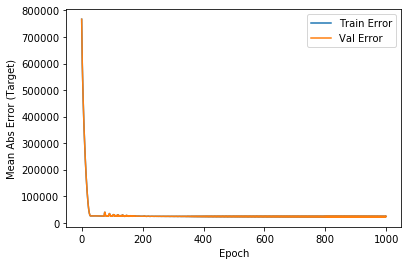

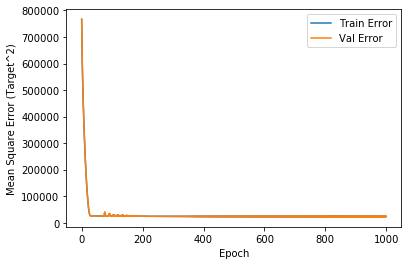

In [10]:
ploting_history(history)

<h2> Checking Evaluation metrics model

In [11]:
    __, mae, __ = model.evaluate(test_data, test_labels, verbose=0)
    print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))

Test Set Mean Abs Error : 62390.12 Comodity in ton


<h2> Predicting Test data

In [12]:
predict_result = model.predict(test_data).flatten()

predicted_vs_actual = pd.DataFrame(list(zip(predict_result, test_labels.tolist())), 
               columns =['Prediction','Actual'])

predicted_vs_actual

,Prediction,Actual
0,699215.50,798232
1,817170.25,842934


<h2> early stoping 

In [15]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_data, train_labels, epochs=epochs, validation_split=0.2, verbose=0, callbacks=[early_stop,PrintDot()])


...........

<h2> Ploting model with early stoping train process

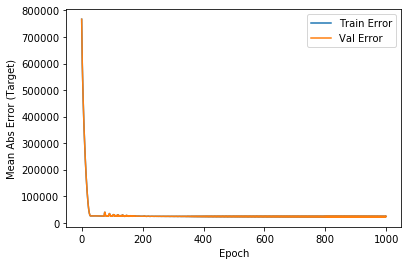

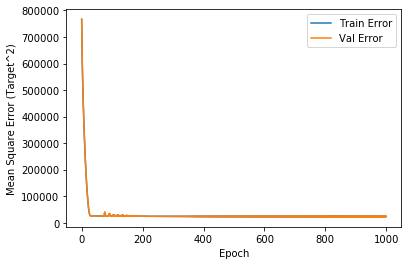

In [16]:
ploting_history(history)

In [17]:
__, mae, __ = model.evaluate(test_data, test_labels, verbose=0)
print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))

Test Set Mean Abs Error : 38440.72 Comodity in ton


<h2> Predicting using model with early stoping

In [18]:
predict_result = model.predict(test_data).flatten()

predicted_vs_actual = pd.DataFrame(list(zip(predict_result, test_labels.tolist())), 
               columns =['Prediction','Actual'])

predicted_vs_actual

,Prediction,Actual
0,726281.0625,798232
1,847864.5000,842934
